In [123]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
import numpy as np
import seaborn as sns
from collections import OrderedDict

### Thompson Sampling for bernoulli trials

In [16]:
# chance for head


In [93]:
# n_heads = np.sum(samples==1)
# n_tails = np.sum(samples==0)
# prior_1 = tfd.Beta(1,1)
# prior_2 = tfd.Beta(1,1)


In [111]:
def argmax_random_ties(x):
    return np.random.choice(np.flatnonzero(x == x.max()))

In [ ]:
np.argmax(tf.reduce_mean(tfd.Beta(alphas, betas).sample(100), axis=0))

In [176]:
alpha_1, beta_1 = 3,2
alpha_2, beta_2 = 1,1

arms = OrderedDict({
    0:[alpha_1, beta_1],
    1:[alpha_2, beta_2]
})

alphas = [alpha_1, alpha_2]
betas = [beta_1, beta_2]

In [175]:
alpha_1/(alpha_1+beta_1)

0.6

In [177]:
true_rew = [tfd.Bernoulli(probs=0.7), tfd.Bernoulli(probs=0.3)]

In [169]:
N_ROUNDS = 1000
k = 100


for i in np.arange(N_ROUNDS):
    arm_means = []
    for arm in arms.keys():
        arm_mean = np.mean(tfd.Beta(*arms[arm]).sample(k))
        arm_means.append(arm_mean)
        arm_mean = arms[arm][0]/np.sum(arms[arm])
   
    # take an action
    action = argmax_random_ties(np.array(arm_means))

    res = true_rew[action].sample(1)

    # print(arms[action])

    if res == 1:
        arms[action][0] +=1
    else:
        arms[action][1] +=1

In [170]:
arms

OrderedDict([(0, [746, 331]), (1, [67, 60])])

In [ ]:
arm_means

In [143]:
action

0

In [89]:
samples = tfd.Bernoulli(probs=c1).sample(10)

<AxesSubplot:ylabel='Count'>

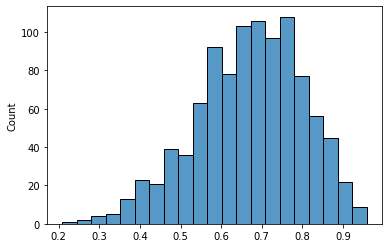

In [91]:
sns.histplot(prior)

In [2]:
# Pretend to load synthetic data set.
features = tfp.distributions.Normal(loc=0., scale=1.).sample(int(100e3))
labels = tfp.distributions.Bernoulli(logits=1.618 * features).sample()

# Specify model.
model = tfp.glm.Bernoulli()

# Fit model given data.
coeffs, linear_response, is_converged, num_iter = tfp.glm.fit(
    model_matrix=features[:, tf.newaxis],
    response=tf.cast(labels, dtype=tf.float32),
    model=model)

In [9]:
negloglik = lambda y, p_y: -p_y.log_prob(y)

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Input([1]),
  tf.keras.layers.Dense(1),
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

In [14]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=negloglik)
model.fit(features, labels, epochs=500, verbose=False)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


TypeError: in user code:

    File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17708\4179497195.py", line 1, in None  *
        lambda y, p_y: -p_y.log_prob(y)
    File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_probability\python\distributions\distribution.py", line 1287, in log_prob  **
        return self._call_log_prob(value, name, **kwargs)
    File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_probability\python\distributions\distribution.py", line 1269, in _call_log_prob
        return self._log_prob(value, **kwargs)
    File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_probability\python\layers\internal\distribution_tensor_coercible.py", line 114, in _log_prob
        return self.tensor_distribution._log_prob(value, **kwargs)
    File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_probability\python\distributions\normal.py", line 186, in _log_prob
        x / scale, self.loc / scale)

    TypeError: `x` and `y` must have the same dtype, got tf.int32 != tf.float32.
